In [1]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os
import zipfile

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /content/sample_data/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /content/sample_data/rps-test-set.zip

--2020-06-17 05:11:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/content/sample_data/rps.zip’

/content/sample_dat 100%[===================>] 191.38M  82.2MB/s    in 2.3s    

2020-06-17 05:11:53 (82.2 MB/s) - ‘/content/sample_data/rps.zip’ saved [200682221/200682221]

--2020-06-17 05:11:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to

In [3]:
local_zip = '/content/sample_data/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/sample_data/')
zip_ref.close()

local_zip = '/content/sample_data/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/sample_data/')
zip_ref.close()

In [4]:
rock_dir = os.path.join('/content/sample_data/rps/rock')
paper_dir = os.path.join('/content/sample_data/rps/paper')
scissors_dir = os.path.join('/content/sample_data/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

total training rock images: 840
total training paper images: 840
total training scissors images: 840


In [5]:
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

['rock01-081.png', 'rock05ck01-107.png', 'rock02-105.png', 'rock05ck01-028.png', 'rock04-057.png', 'rock07-k03-064.png', 'rock06ck02-040.png', 'rock02-036.png', 'rock05ck01-078.png', 'rock03-017.png']
['paper03-066.png', 'paper06-023.png', 'paper01-020.png', 'paper02-046.png', 'paper03-089.png', 'paper04-107.png', 'paper06-050.png', 'paper01-118.png', 'paper03-049.png', 'paper05-048.png']
['scissors01-062.png', 'testscissors02-112.png', 'testscissors02-051.png', 'scissors01-023.png', 'scissors01-082.png', 'scissors01-061.png', 'scissors02-101.png', 'scissors04-041.png', 'scissors03-028.png', 'testscissors03-073.png']


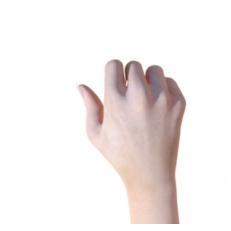

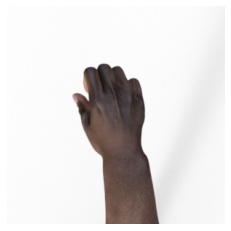

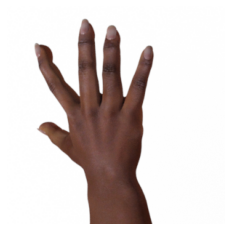

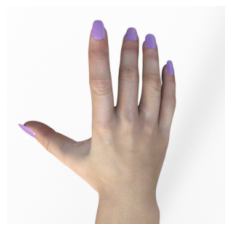

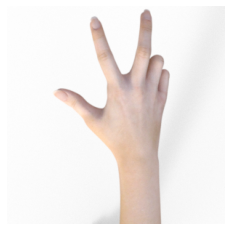

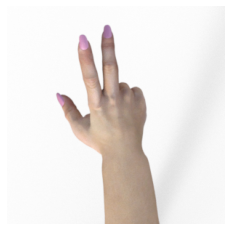

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [9]:
class myCallback1(tf.keras.callbacks.Callback):
            def on_epoch_end(self, epoch, logs={}):
                if(logs.get('accuracy')>0.9950):
                    print("\nReached 99.50% accuracy so cancelling training!")
                    self.model.stop_training = True
callbacks=myCallback1()

In [10]:
TRAINING_DIR = "/content/sample_data/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True)
VALIDATION_DIR = "/content/sample_data/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(train_generator, epochs=100, steps_per_epoch=20, 
                    validation_data = validation_generator, 
                    verbose = 1, validation_steps=3,
                    callbacks=[callbacks])

Epoch 1/100
20/20 [==============================] - 24s 1s/step - loss: 1.1284 - accuracy: 0.3540 - val_loss: 1.0893 - val_accuracy: 0.3333
Epoch 2/100
20/20 [==============================] - 23s 1s/step - loss: 1.0795 - accuracy: 0.3980 - val_loss: 0.9304 - val_accuracy: 0.5672
Epoch 3/100
20/20 [==============================] - 23s 1s/step - loss: 0.9811 - accuracy: 0.4976 - val_loss: 0.9142 - val_accuracy: 0.4328
Epoch 4/100
20/20 [==============================] - 23s 1s/step - loss: 0.7807 - accuracy: 0.6417 - val_loss: 0.5003 - val_accuracy: 0.8091
Epoch 5/100
20/20 [==============================] - 23s 1s/step - loss: 0.5245 - accuracy: 0.7956 - val_loss: 0.2978 - val_accuracy: 0.8871
Epoch 6/100
20/20 [==============================] - 23s 1s/step - loss: 0.3983 - accuracy: 0.8472 - val_loss: 0.1638 - val_accuracy: 0.9516
Epoch 7/100
20/20 [==============================] - 23s 1s/step - loss: 0.3136 - accuracy: 0.8806 - val_loss: 0.1756 - val_accuracy: 0.9435
Epoch 8/100
2

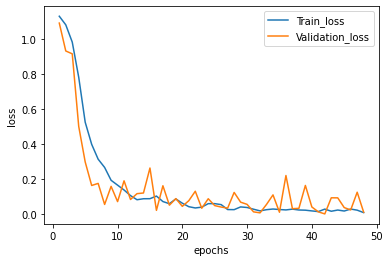

In [14]:
epochs=len(history.history['loss'])
plt.plot([i for i in range(1,epochs+1)],history.history['loss'],label="Train_loss")
plt.plot([i for i in range(1,epochs+1)],history.history['val_loss'],label="Validation_loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

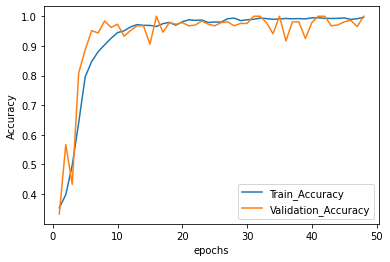

In [15]:
plt.plot([i for i in range(1,epochs+1)],history.history['accuracy'],label="Train_Accuracy")
plt.plot([i for i in range(1,epochs+1)],history.history['val_accuracy'],label="Validation_Accuracy")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()